# Example answers for final exercise

In [1]:
import pandas as pd
import seaborn as sns
titanic = pd.read_csv("https://milliams.com/courses/data_analysis_python/titanic.csv")
titanic

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,NaN,NaN,yes
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,NaN,NaN,yes
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no


## Summarising

### Find the average age of all people on board

In [2]:
titanic["age"].mean()

30.436734693877504

### Use a filter to select only the males

In [3]:
all_males = titanic[titanic["gender"] == "male"]

### Find the average age of the males on board

In [4]:
all_males["age"].mean()

30.83231351981346

## Filtering

### Select on the people in 3<sup>rd</sup> class

In [5]:
titanic[titanic["class"] == "3rd"]

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
1313,"Yūsuf, Mrs. Kātrīn",female,23.0,3rd,C,Lebanon,2668.0,22.0702,0.0,2.0,yes
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0.0,0.0,no
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0.0,0.0,no
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,0.0,0.0,yes


### Select just the passengers

The technique shown in class was to combine together multiple selectors with `|`:

In [6]:
passengers = titanic[
    (titanic["class"] == "1st") | 
    (titanic["class"] == "2nd") | 
    (titanic["class"] == "3rd")
]

However, it is also possible to use the `isin` method to select from a list of matching options:

In [7]:
passengers = titanic[titanic["class"].isin(["1st", "2nd", "3rd"])]

## Plotting

### Plot the distribution of ages for males and females

Using `displot` with `age` as the main variable shows the distribution. YOu can overlay the two genders using `hue="gender"`. To simplify the view, you can set `kind="kde"`. Since KDE mode smooths the data, you can also set a cutoff of 0 to avoid it showing negative ages:

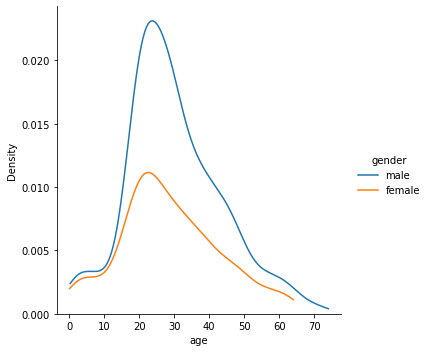

In [8]:
sns.displot(
    data=passengers,
    x="age",
    hue="gender",
    kind="kde",
    cut=0
)

### How does this differ by class?

All that has changed from the last plot is adding in the split by `class` over multiple columns:

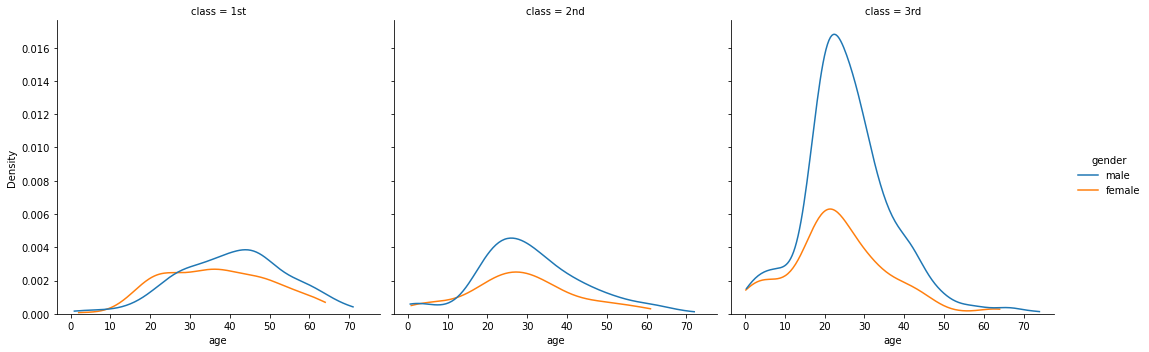

In [9]:
sns.displot(
    data=passengers,
    x="age",
    hue="gender",
    kind="kde",
    cut=0,
    col="class",
    col_order=["1st", "2nd", "3rd"]
)

## Combining

To reduce the duplication of effort here, I create a function which, given a set of data, calculated the survived fraction within. This is then called three times, once for each class:

In [10]:
def survived_ratio(df):
    yes = df[df["survived"] == "yes"]
    return len(yes) / len(df)

ratio_1st = survived_ratio(passengers[passengers["class"] == "1st"])
ratio_2nd = survived_ratio(passengers[passengers["class"] == "2nd"])
ratio_3rd = survived_ratio(passengers[passengers["class"] == "3rd"])

print(ratio_1st, ratio_2nd, ratio_3rd)

0.6203703703703703 0.4154929577464789 0.2552891396332863
